In [1]:
import pandas as pd
user = pd.read_csv("../../../../../bigcontest/data/preprocessed/user_info.csv")
data = pd.read_csv("../../../../../bigcontest/data/preprocessed/dat3.csv")

In [2]:
data2 = pd.merge(data, user, how = 'inner', on = 'user_id')

In [72]:
data2.to_csv('../../../../../bigcontest/data/preprocessed/for_som.csv')

In [4]:
data2.index = data2["user_id"]

In [5]:
data2.drop("user_id", axis = 1, inplace = True)

In [6]:
data2.shape

(370435, 13)

In [7]:
from minisom import MiniSom
import bokeh
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np
import pandas as pd
from matplotlib.pyplot import colorbar

In [15]:
map_n= [n for n in range(2,6)]
para_sigma= [np.round(sigma*0.1,2) for sigma in range(1,10)]
para_learning_rate= [np.round(learning_rate*0.1,2) for learning_rate in range(1,10)]
indexxx = 0

#결과 값을 담을 리스트 res 생성
res = []
#모든 조합에 대해 모델 생성 및 qe,te값 계산
for n in map_n:
    for sigma in para_sigma:
        for lr in para_learning_rate:
            s_time = pd.Timestamp.now()
            indexxx += 1
            try:
                #랜덤으로 초기값을 설정하는 경우
                estimator = MiniSom(n,n,13,sigma =sigma, learning_rate = lr, topology='hexagonal',random_seed=0)
                estimator.random_weights_init(data2.values)
                estimator.train(data2.values,1000,random_order=True)
                qe = estimator.quantization_error(data2.values)
                #te = estimator.topographic_error(data.values)
                winner_coordinates = np.array([estimator.winner(x) for x in data2.values]).T
                cluster_index = np.ravel_multi_index(winner_coordinates,(n,n))
                
                res.append([str(n)+'x'+str(n),sigma,lr,'random_init',qe,len(np.unique(cluster_index))])                
            except ValueError as e:
                print(e)
            e_time = pd.Timestamp.now()
            print('\n총 소요시간:',e_time-s_time, indexxx)


총 소요시간: 0 days 00:00:04.104953 1

총 소요시간: 0 days 00:00:04.054602 2

총 소요시간: 0 days 00:00:04.117203 3

총 소요시간: 0 days 00:00:04.044879 4

총 소요시간: 0 days 00:00:04.001998 5

총 소요시간: 0 days 00:00:04.455761 6

총 소요시간: 0 days 00:00:04.026702 7

총 소요시간: 0 days 00:00:04.023928 8

총 소요시간: 0 days 00:00:04.085704 9

총 소요시간: 0 days 00:00:04.034146 10

총 소요시간: 0 days 00:00:04.061512 11

총 소요시간: 0 days 00:00:04.032412 12

총 소요시간: 0 days 00:00:04.018016 13

총 소요시간: 0 days 00:00:04.046517 14

총 소요시간: 0 days 00:00:04.049634 15

총 소요시간: 0 days 00:00:04.044999 16

총 소요시간: 0 days 00:00:04.109523 17

총 소요시간: 0 days 00:00:04.011734 18

총 소요시간: 0 days 00:00:04.062940 19

총 소요시간: 0 days 00:00:04.084207 20

총 소요시간: 0 days 00:00:04.057905 21

총 소요시간: 0 days 00:00:04.047870 22

총 소요시간: 0 days 00:00:04.065807 23

총 소요시간: 0 days 00:00:04.441836 24

총 소요시간: 0 days 00:00:04.135988 25

총 소요시간: 0 days 00:00:04.059794 26

총 소요시간: 0 days 00:00:04.125539 27

총 소요시간: 0 days 00:00:04.128051 28

총 소요시간: 0 days 00:00:04.1478


총 소요시간: 0 days 00:00:04.372742 232

총 소요시간: 0 days 00:00:04.355445 233

총 소요시간: 0 days 00:00:04.545126 234

총 소요시간: 0 days 00:00:04.647490 235

총 소요시간: 0 days 00:00:04.896818 236

총 소요시간: 0 days 00:00:04.400920 237

총 소요시간: 0 days 00:00:04.412872 238

총 소요시간: 0 days 00:00:04.403228 239

총 소요시간: 0 days 00:00:04.438253 240

총 소요시간: 0 days 00:00:04.362930 241

총 소요시간: 0 days 00:00:04.406942 242

총 소요시간: 0 days 00:00:04.373358 243

총 소요시간: 0 days 00:00:04.633888 244

총 소요시간: 0 days 00:00:04.633339 245

총 소요시간: 0 days 00:00:04.666874 246

총 소요시간: 0 days 00:00:04.641700 247

총 소요시간: 0 days 00:00:04.598501 248

총 소요시간: 0 days 00:00:04.630043 249

총 소요시간: 0 days 00:00:04.686480 250

총 소요시간: 0 days 00:00:04.768736 251

총 소요시간: 0 days 00:00:04.627846 252

총 소요시간: 0 days 00:00:04.516258 253

총 소요시간: 0 days 00:00:04.479076 254

총 소요시간: 0 days 00:00:04.533899 255

총 소요시간: 0 days 00:00:04.573612 256

총 소요시간: 0 days 00:00:04.566326 257

총 소요시간: 0 days 00:00:04.692305 258

총 소요시간: 0 days 00:00:04.546

In [16]:
df_res = pd.DataFrame(res,columns=['map_size','sigma','learning_rate','init_method','qe','n_cluster']) 

In [44]:
df_res = pd.read_csv('minisom2_result.csv') # 이전에 돌린거 불러옴!

In [10]:
df_res[df_res["map_size"] == '2x2'].sort_values(by=['qe'],ascending=True, ignore_index=True)

,map_size,sigma,learning_rate,init_method,qe,n_cluster
0,2x2,0.9,0.1,random_init,3.169236,4
1,2x2,0.8,0.1,random_init,3.169352,4
2,2x2,0.7,0.1,random_init,3.179433,4
3,2x2,0.9,0.2,random_init,3.188360,4
4,2x2,0.9,0.3,random_init,3.189927,4
...,...,...,...,...,...,...
76,2x2,0.5,0.2,random_init,3.229457,4
77,2x2,0.4,0.2,random_init,3.229482,4
78,2x2,0.3,0.5,random_init,3.254423,4
79,2x2,0.2,0.5,random_init,3.254423,4


In [31]:
df_res[df_res["map_size"] == '3x3'].sort_values(by=['qe'],ascending=True, ignore_index=True)

,map_size,sigma,learning_rate,init_method,qe,n_cluster
0,3x3,0.2,0.2,random_init,1.946765,9
1,3x3,0.1,0.2,random_init,1.946765,9
2,3x3,0.5,0.2,random_init,1.951033,9
3,3x3,0.3,0.2,random_init,1.963016,9
4,3x3,0.1,0.3,random_init,1.966070,9
...,...,...,...,...,...,...
76,3x3,0.4,0.9,random_init,2.098014,9
77,3x3,0.3,0.9,random_init,2.098017,9
78,3x3,0.2,0.9,random_init,2.098017,9
79,3x3,0.1,0.9,random_init,2.098017,9


In [37]:
estimator = MiniSom(2,2,13,sigma = 0.9, learning_rate = 0.1, topology='hexagonal',random_seed=0)
estimator.random_weights_init(data2.values)
estimator.train(data2.values,1000,random_order=True)
winner_coordinates = np.array([estimator.winner(x) for x in data2.values])

In [36]:
estimator2 = MiniSom(3,3,13,sigma = 0.2, learning_rate = 0.2, topology='hexagonal',random_seed=0)
estimator2.random_weights_init(data2.values)
estimator2.train(data2.values,1000,random_order=True)
winner_coordinates2 = np.array([estimator2.winner(x) for x in data2.values])

In [38]:
data2['2by2_cluster1'] = winner_coordinates[:,0]
data2['2by2_cluster2'] = winner_coordinates[:,1]

In [40]:
data2['3by3_cluster1'] = winner_coordinates2[:,0]
data2['3by3_cluster2'] = winner_coordinates2[:,1]

In [53]:
data2.drop(['2by2_cluster1', '2by2_cluster2', '3by3_cluster1', '3by3_cluster2'], axis = 1, inplace = True)

In [42]:
# data2.to_csv("../../../../../bigcontest/data/preprocessed/log_clustered.csv")

<AxesSubplot:>

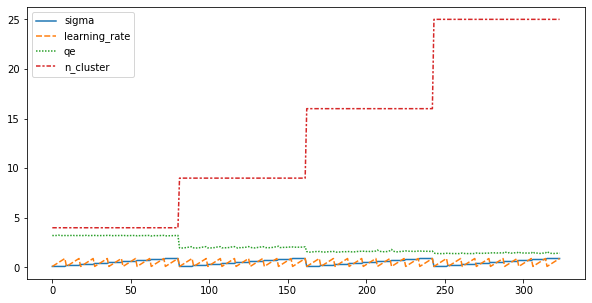

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df_res)

In [68]:
np.unique(cluster_index)

array([0, 1, 2, 3], dtype=int64)

,cluster이름,개수
0,0,91276
1,1,103584
2,2,107454
3,3,68121


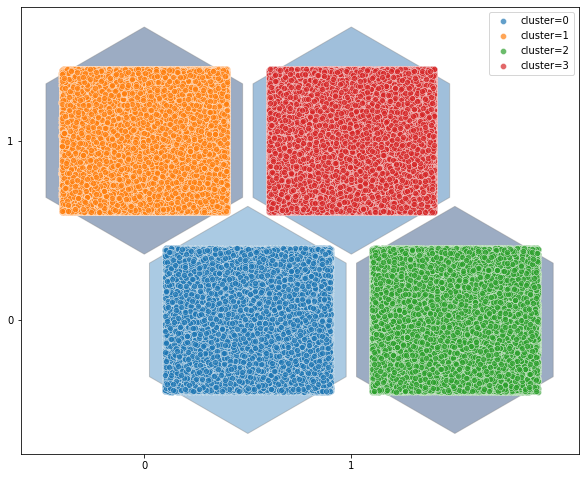

In [71]:
xx, yy = estimator.get_euclidean_coordinates()
umatrix = estimator.distance_map()
weights = estimator.get_weights()
cluster_index = np.ravel_multi_index(winner_coordinates.T,(2,2))

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.set_aspect('equal')

# iteratively add hexagons
# plotting the distance map as background
# 해당 셀과 다른 이웃들 간 거리를 표현, 밝을수록 가깝고, 어두울수록 멀다
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * 2 / np.sqrt(3) * 3 / 4
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=matplotlib.cm.Blues(umatrix[i, j]), 
                             alpha=.4, 
                             edgecolor='gray')
        plot = ax.add_patch(hex)

#x축,y축 간격 설정 
xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plot = plt.xticks(xrange-.5, xrange)
plot = plt.yticks(yrange * 2 / np.sqrt(3) * 3 / 4, yrange)

#output노드에 해당하는 클러스터 종류 및 밀도 확인         
cnt=[]
for c in np.unique(cluster_index):
        x_= [estimator.convert_map_to_euclidean(estimator.winner(x))[0] + (2*np.random.rand(1)[0]-1)*0.4 for x in data2.values[cluster_index==c]]
        y_= [estimator.convert_map_to_euclidean(estimator.winner(x))[1] + (2*np.random.rand(1)[0]-1)*0.4 for x in data2.values[cluster_index==c]]
        y_= [(i* 2 / np.sqrt(3) * 3 / 4) for i in y_]
    
        plot = sns.scatterplot( x = x_,  y= y_ ,label='cluster='+str(c),alpha=.7)
        
        #클러스터에 속한 데이터 개수 데이터프레임으로 출력
        cnt.append([c,len(x_)])

#클러스터별 개수를 표 형태로 출력 
df_cnt = pd.DataFrame(cnt,columns=['cluster이름','개수'])
df_cnt





In [ ]:
#output노드에 해당하는 클러스터 종류 및 밀도 확인         
cnt=[]
for c in np.unique(cluster_index):
        x_= [estimator.convert_map_to_euclidean(estimator.winner(x))[0] + (2*np.random.rand(1)[0]-1)*0.4 for x in data2.values[cluster_index==c]]
        y_= [estimator.convert_map_to_euclidean(estimator.winner(x))[1] + (2*np.random.rand(1)[0]-1)*0.4 for x in data2.values[cluster_index==c]]
        y_= [(i* 2 / np.sqrt(3) * 3 / 4) for i in y_]
    
        plot = sns.scatterplot( x = x_,  y= y_ ,label='cluster='+str(c),alpha=.7)
        
        #클러스터에 속한 데이터 개수 데이터프레임으로 출력
        cnt.append([c,len(x_)])

#클러스터별 개수를 표 형태로 출력 
df_cnt = pd.DataFrame(cnt,columns=['cluster이름','개수'])
df_cnt

